# SEDS PROGRAMMING CLUB TASK - 1 (ASTEROID CLASSIFICATION)

Asteroids are small, rocky objects that orbit the Sun.
![cool pic of asteroids](SEDS/task-1/Asteroids.jpg "asteroid")
#### A few terms to know before going through this NoteBook
1. **MOI**  :
Minimum Orbit Intersection
is a measure used in astronomy to assess potential close approaches and collision risks between astronomical objects.(in our case the Earth)  It is defined as the distance between the closest points of the osculating orbits of two bodies. 

2. **Absolute Magnitude** :
An asteroid's absolute magnitude is the visual magnitude an observer would record if the asteroid were placed 1 Astronomical Unit (au) away, and 1 au from the Sun and at a zero phase angle.
*The more luminous an object, the smaller the numerical value of its absolute magnitude.*




IMPORTS

In [27]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import os
from sklearn import metrics as ms
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split

DATA DESCRIPTION AND IRREGULARITIES

In [28]:
df=pd.read_csv('nasa.csv')

In [29]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [30]:
df.shape

(4687, 40)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [32]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [33]:
df.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


**CHECK CORRELATION**

<AxesSubplot:>

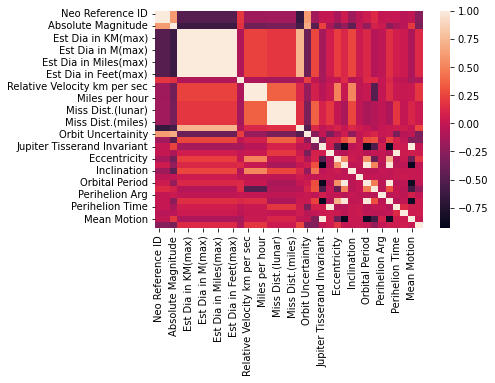

In [34]:
sn.heatmap(df.corr())

In [35]:
df=df.drop(['Est Dia in KM(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
             'Relative Velocity km per sec','Miles per hour',
             'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)'],axis=1)
df.shape

(4687, 28)

In [36]:
df.nunique()

Neo Reference ID               3692
Name                           3692
Absolute Magnitude              269
Est Dia in KM(min)              269
Close Approach Date             777
Epoch Date Close Approach       777
Relative Velocity km per hr    4687
Miss Dist.(kilometers)         4661
Orbiting Body                     1
Orbit ID                        188
Orbit Determination Date       2680
Orbit Uncertainity               10
Minimum Orbit Intersection     3678
Jupiter Tisserand Invariant    2495
Epoch Osculation                429
Eccentricity                   3692
Semi Major Axis                3692
Inclination                    3692
Asc Node Longitude             3692
Orbital Period                 3692
Perihelion Distance            3692
Perihelion Arg                 3692
Aphelion Dist                  3692
Perihelion Time                3692
Mean Anomaly                   3692
Mean Motion                    3692
Equinox                           1
Hazardous                   

In [37]:
df=df.drop(['Equinox','Neo Reference ID','Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date','Epoch Osculation','Perihelion Time','Orbiting Body'],axis=1)
df.shape

(4687, 18)

**DROPPED COLUMNS WITH HIGH CORRELATION AND LESS UNIQUE VALUES**

we have dropped the values that were equal but with different units and some others that were insignificant

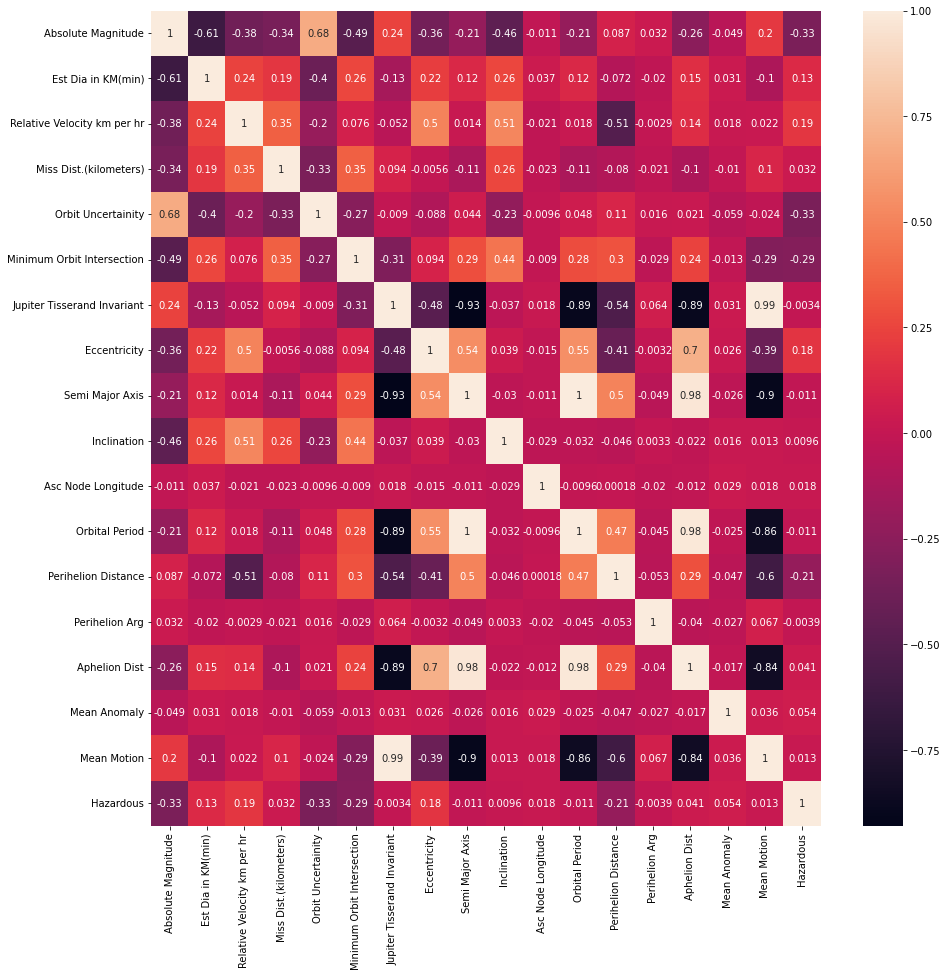

In [38]:
plt.figure(figsize=(15,15))
sn.heatmap(df.corr(),annot=True)
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Relative Velocity km per hr  4687 non-null   float64
 3   Miss Dist.(kilometers)       4687 non-null   float64
 4   Orbit Uncertainity           4687 non-null   int64  
 5   Minimum Orbit Intersection   4687 non-null   float64
 6   Jupiter Tisserand Invariant  4687 non-null   float64
 7   Eccentricity                 4687 non-null   float64
 8   Semi Major Axis              4687 non-null   float64
 9   Inclination                  4687 non-null   float64
 10  Asc Node Longitude           4687 non-null   float64
 11  Orbital Period               4687 non-null   float64
 12  Perihelion Distance          4687 non-null   float64
 13  Perihelion Arg    

**TO CLASSIFY ASTEROIDS AS HAZARDOUS OR NON-HAZARDOUS**

*WE MUST FIND THE COLUMNS WITH THE LEAST CORRELATION TO AVOID BIASES*

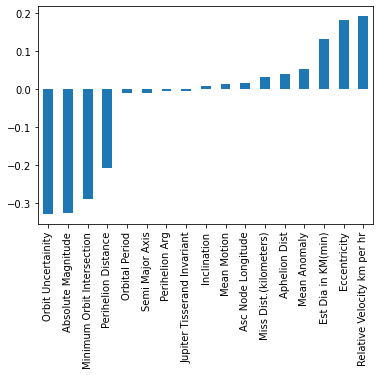

In [40]:
df.corr()['Hazardous'][:-1].sort_values().plot(kind='bar')
plt.show()

In [41]:
y=df.iloc[:100,17:18]#HAZARDOUS 
x=df.iloc[:100,5:6]#MOI
print(x,y)

    Minimum Orbit Intersection
0                     0.025282
1                     0.186935
2                     0.043058
3                     0.005512
4                     0.034798
..                         ...
95                    0.044938
96                    0.143015
97                    0.019717
98                    0.122189
99                    0.003356

[100 rows x 1 columns]     Hazardous
0        True
1       False
2        True
3       False
4        True
..        ...
95       True
96      False
97       True
98      False
99      False

[100 rows x 1 columns]


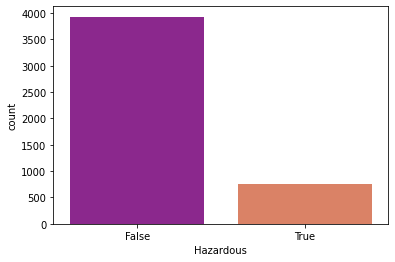

In [42]:
sn.countplot(x="Hazardous",data=df,palette='plasma')
plt.show()

**USING LINEAR REGRESSION TO FIND THE TREND**

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [44]:
lr=LR()

lr.fit(x_train,y_train)

LinearRegression()

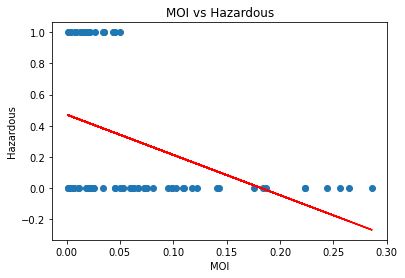

In [45]:
plt.scatter(x_train,y_train)
plt.xlabel("MOI")
plt.ylabel("Hazardous")
plt.title("MOI vs Hazardous")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.show()

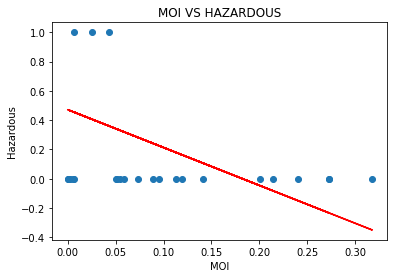

In [46]:
plt.scatter(x_test,y_test)
plt.xlabel("MOI")
plt.ylabel("Hazardous")
plt.title("MOI VS HAZARDOUS")
plt.plot(x_test,lr.predict(x_test),color="red")
plt.show()

**USING RANDOM FOREST TO CLASSIFY THE ASTEROIDS**

In [47]:
x1=df.iloc[:,0:6:5]#abs mag & moi
y1=df.iloc[:,17:18]
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1)

In [48]:
rfc=RFC()
rfc1=RFC()
rfc.fit(x_train,y_train)#only moi
rfc1.fit(x_train1,y_train1)#both abs mag and moi

/var/folders/lr/tv_mh2r13bb7xs3k5qmj606m0000gn/T/ipykernel_17896/779297620.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)#only moi
/var/folders/lr/tv_mh2r13bb7xs3k5qmj606m0000gn/T/ipykernel_17896/779297620.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(x_train1,y_train1)#both abs mag and moi


RandomForestClassifier()

**ONLY USING MOI**

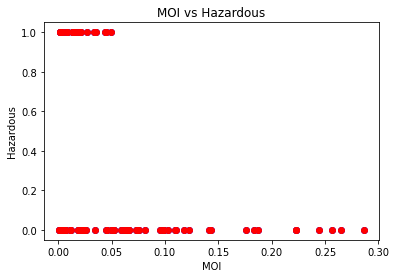

In [49]:
plt.scatter(x_train,y_train,color='blue')
plt.xlabel("MOI")
plt.ylabel("Hazardous")
plt.title("MOI vs Hazardous")
plt.scatter(x_train,rfc.predict(x_train),color="red")
plt.show()

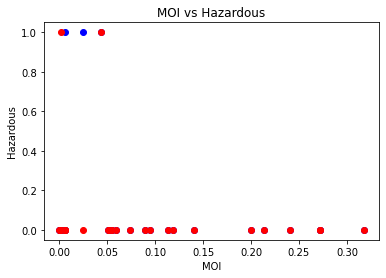

In [50]:
plt.scatter(x_test,y_test,color='blue')
plt.xlabel("MOI")
plt.ylabel("Hazardous")
plt.title("MOI vs Hazardous")
plt.scatter(x_test,rfc.predict(x_test),color="red")
plt.show()

In [51]:
print("TRAINING ACCURACY: ",rfc.score(x_train,y_train)*100)
print("TESTING ACCURACY: ",rfc.score(x_test,y_test)*100)

TRAINING ACCURACY:  100.0
TESTING ACCURACY:  88.0


**USING MOI AND ABS MAG**

*INCREASE IN ACCURACY IS NOTED*

In [52]:
print("TRAINING ACCURACY: ",rfc1.score(x_train1,y_train1)*100)
print("TESTING ACCURACY: ",rfc1.score(x_test1,y_test1)*100)

TRAINING ACCURACY:  100.0
TESTING ACCURACY:  99.9146757679181
